## Project 3 

### Page View Time Series Visializer

In [1]:
#imporitng Libraries
import pandas as pd

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)

df = pd.read_csv('data/fcc-forum-pageviews.csv', index_col="date")


# Clean data
df = df.drop(df[(df['value'] <df['value'].quantile(0.025)) | (df['value'] > df['value'].quantile(0.975))].index)


def draw_line_plot():
    # Draw line plot
    fig= plt.figure()
    plt.plot(df['value'], color = 'red');
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('PageView')




    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()

    df_bar['Years'] = pd.DatetimeIndex(df_bar.index).year
    df_bar['Months']  = pd.DatetimeIndex(df_bar.index).month
    df_bar = pd.DataFrame(df_bar.groupby(['Years', 'Months'], sort=False)['value'].mean().round().astype(int))

    df_bar = df_bar.unstack()

    month_names=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
             'August', 'September', 'October', 'November', 'December']

    # Draw a boxplot
    fig = df_bar.plot(kind = 'bar', figsize= (15,10)).figure

    plt.title("Daily freeCodeCamp Forum Average Page Views per Month")
    plt.xlabel("Years")
    plt.ylabel("Averge Page Views")
    lg = plt.legend(title = 'Month', fontsize = 15, labels = month_names)
    title = lg.get_title()
    title.set_fontsize(15)





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['Year'] = pd.DatetimeIndex(df_box["date"]).year
    df_box['Month'] = pd.DatetimeIndex(df_box["date"]).month
    
    # Draw box plots (using Seaborn)
    plt1 = sns.boxplot(x = "Year", y= "value", data=df_box)
    plt1.set_title("Year wise boxplot (Trend)")
    plt1.set_xlabel("Year")
    plt1.set_ylabel("Page Views")

     # Draw box plots (using Seaborn)
    plt2 = sns.boxplot(x = "Month", y= "value", data=df_box)
    plt2.set_title("Year wise boxplot (Trend)")
    plt2.set_xlabel("Month")
    plt2.set_ylabel("Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


In [3]:
data = pd.read_csv('data/fcc-forum-pageviews.csv', index_col="date")

Text(0, 0.5, 'Page Views')

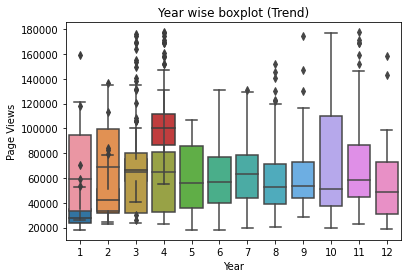

In [66]:
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    
#     df_box['year'] = [d.year for d in df_box.date]
#     df_box['month'] = [d.strftime('%b') for d in df_box.date]
    df_box['Year'] = pd.DatetimeIndex(df_box["date"]).year
    df_box['Month'] = pd.DatetimeIndex(df_box["date"]).month
    
    # Draw box plots (using Seaborn)
    plt1 = sns.boxplot(x = "Year", y= "value", data=df_box)
    plt1.set_title("Year wise boxplot (Trend)")
    plt1.set_xlabel("Year")
    plt1.set_ylabel("Page Views")

    # Draw box plots (using Seaborn)
    plt2 = sns.boxplot(x = "Month", y= "value", data=df_box)
    plt2.set_title("Year wise boxplot (Trend)")
    plt2.set_xlabel("Month")
    plt2.set_ylabel("Page Views")
    

Text(0, 0.5, 'Page Views')

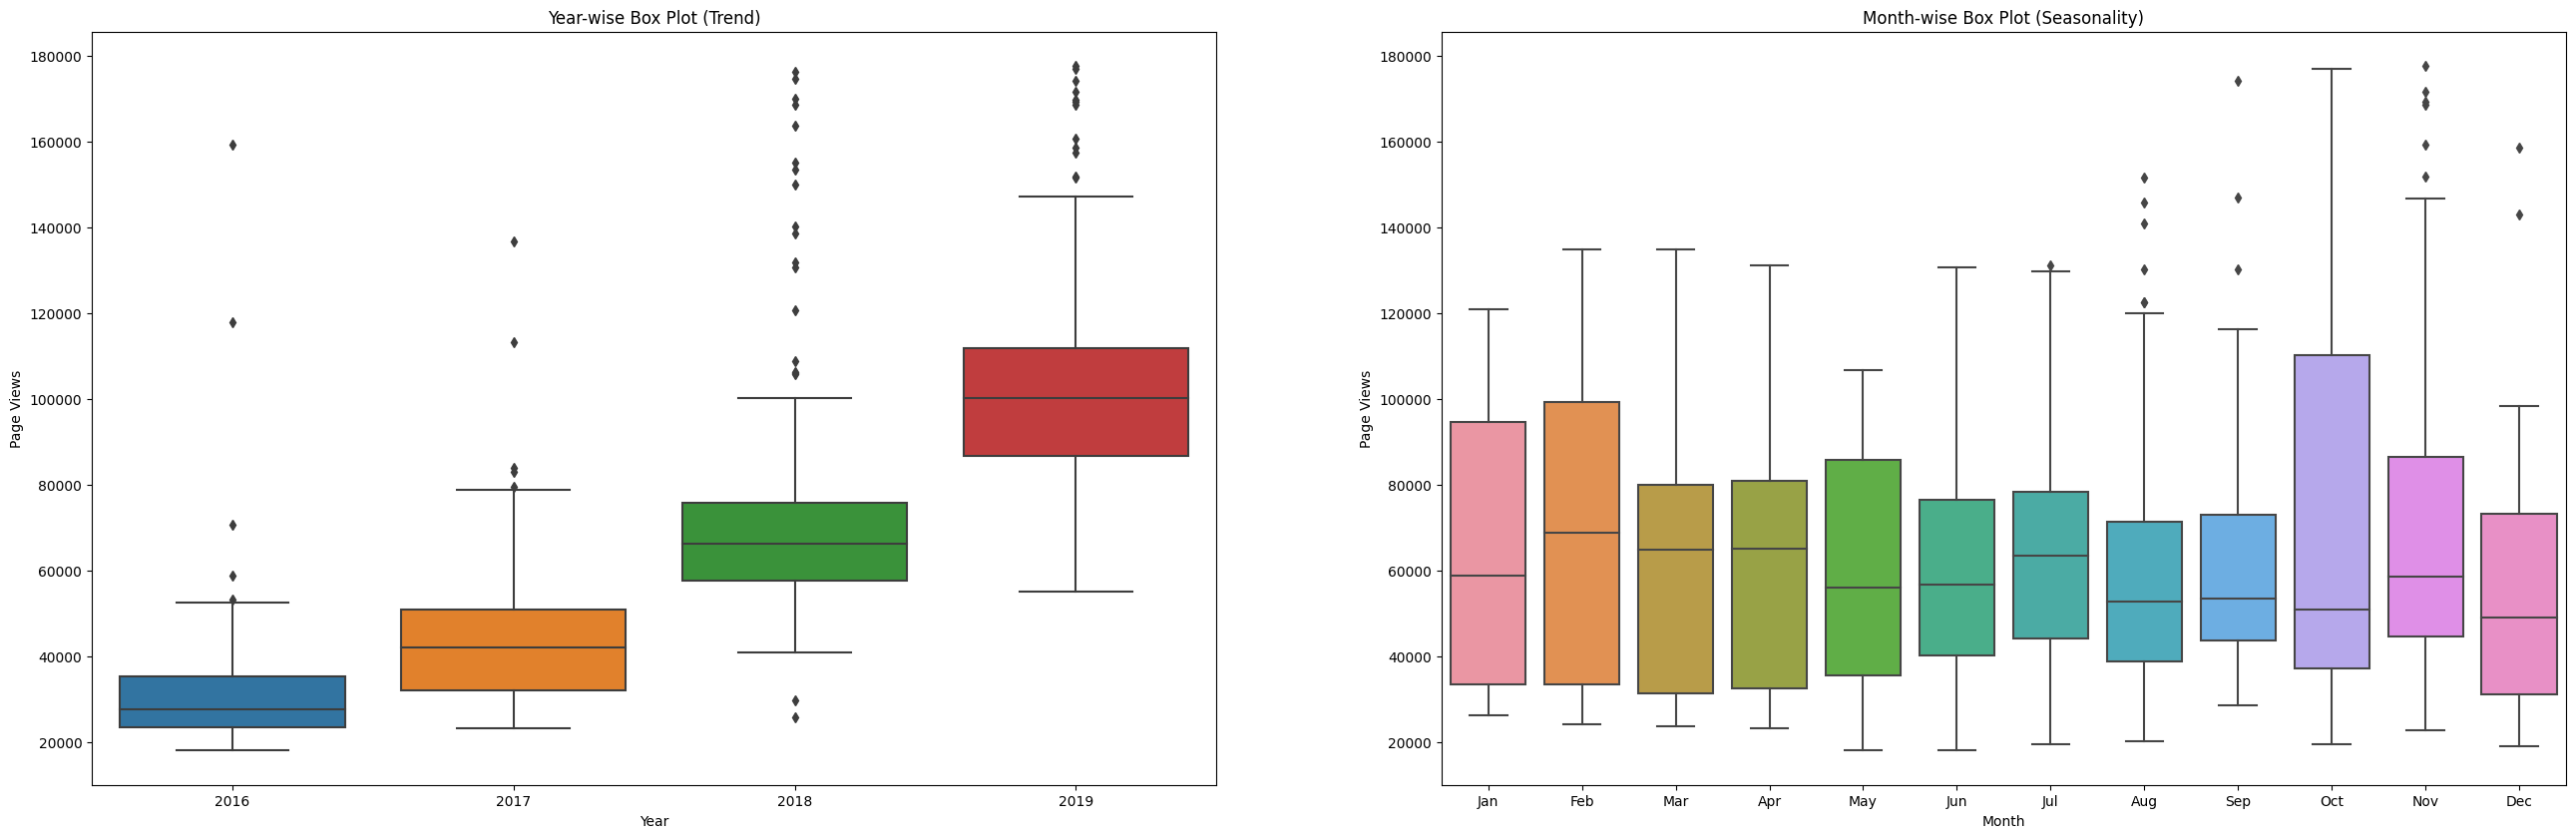

In [70]:
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in pd.DatetimeIndex(df_box.date)]
    df_box['month'] = [d.strftime('%b') for d in pd.DatetimeIndex(df_box.date)]

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(32, 10), dpi=100)
    
    # Yearly boxplot
    sns.boxplot(data=df_box, x="year", y="value", ax=axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")
    
    # Monthly boxplot
    month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=axes[1])
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

In [6]:
df  = data.drop(data[(data['value'] <data['value'].quantile(0.025)) | (data['value'] > data['value'].quantile(0.975))].index)

In [7]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [8]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


Text(0, 0.5, 'PageView')

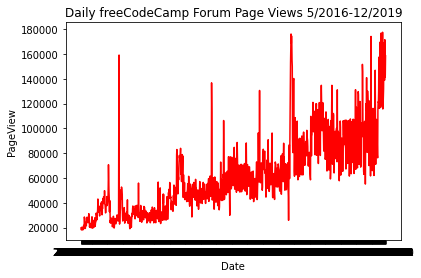

In [9]:

# x = df['date']
# y = df['value'].mean()
fig= plt.figure()
plt.plot(df['value'], color = 'red');
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('PageView')

<BarContainer object of 1238 artists>

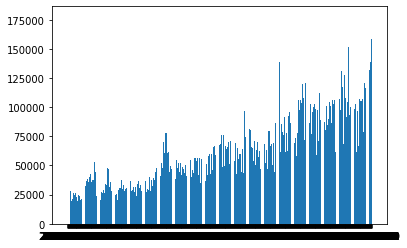

In [31]:
fig = plt.figure()

plt.bar(df.index,df['value'])

[Text(0, 0, '2016.0')]

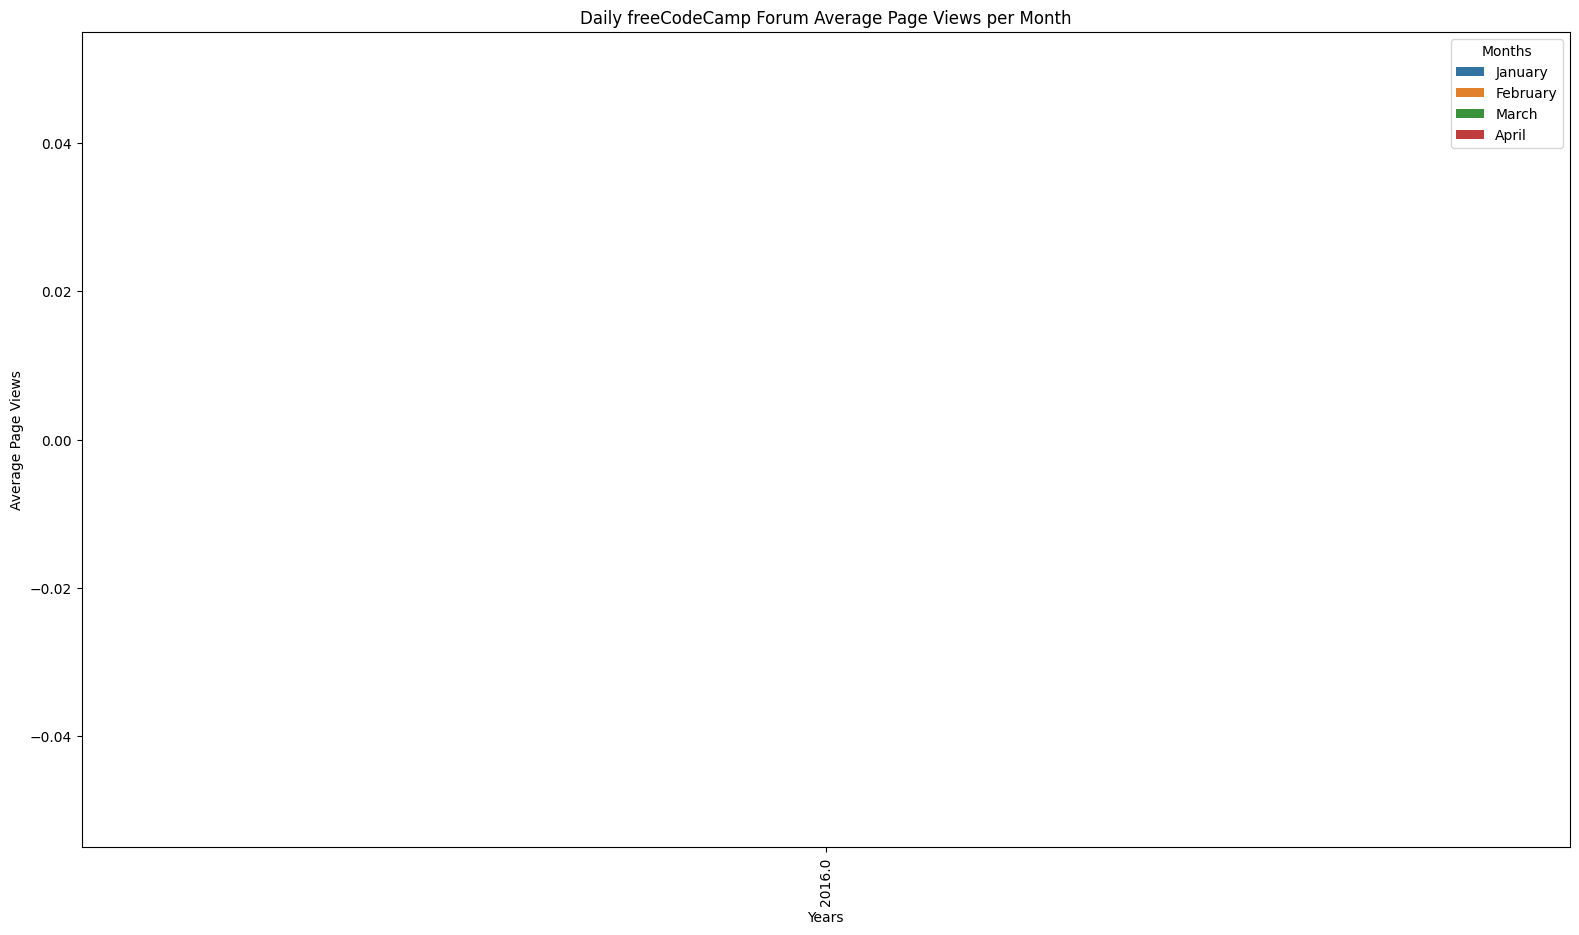

In [54]:
df_bar = df.copy()



# df['time_date'] = pd.to_datetime(df['time_date'], utc=True)

# df.set_index('time_date', inplace=True)

# print(df.index.date)

#df_bar.index = pd.to_datetime(df_bar.index, utc= True)
df_bar['Years'] = pd.DatetimeIndex(df_bar.index).year
df_bar['Months']  = pd.DatetimeIndex(df_bar.index).month
df_bar = pd.DataFrame(df_bar.groupby(['Years', 'Months'], sort=False)['value'].mean().round().astype(int))

df_bar = df_bar.rename(columns = {'value': 'Average Page Views'})
df_bar = df.reset_index()


missing_data = {
    'Years': [2016,2016,2016,2016],
    'Months': ['January', 'February', 'March', 'April'],
    'Average Page Views': [0,0,0,0]
}

df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])

# Draw a boxplot
fig, ax = plt.subplots(figsize=(19.2, 10.8), dpi= 100)

ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")


chart = sns.barplot(data=df_bar, x="Years", y="Average Page Views", hue="Months", palette="tab10")

chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')

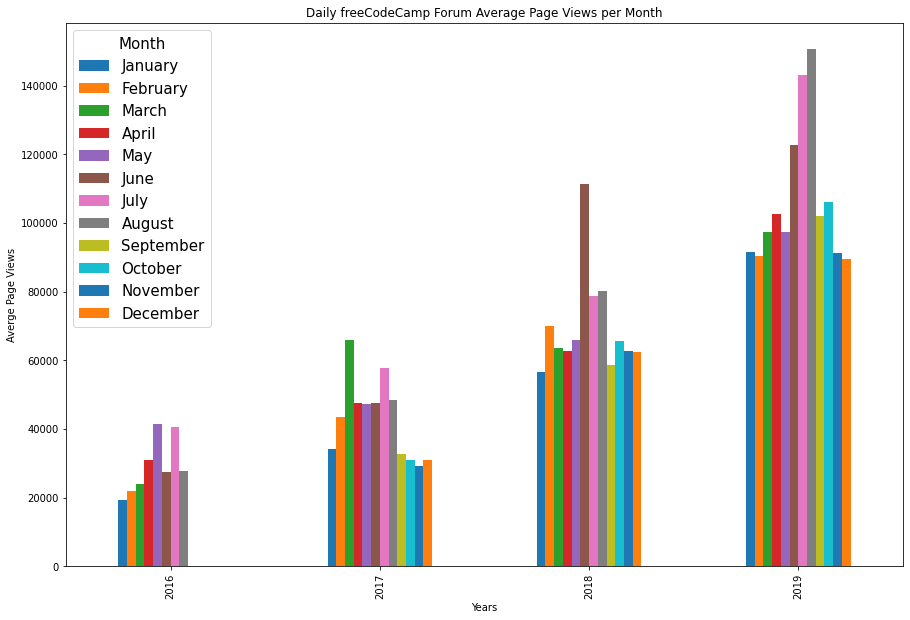

In [58]:
df_bar = df.copy()

df_bar['Years'] = pd.DatetimeIndex(df_bar.index).year
df_bar['Months']  = pd.DatetimeIndex(df_bar.index).month
df_bar = pd.DataFrame(df_bar.groupby(['Years', 'Months'], sort=False)['value'].mean().round().astype(int))

df_bar = df_bar.unstack()

month_names=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
             'August', 'September', 'October', 'November', 'December']

# Draw a boxplot
fig = df_bar.plot(kind = 'bar', figsize= (15,10)).figure

plt.title("Daily freeCodeCamp Forum Average Page Views per Month")
plt.xlabel("Years")
plt.ylabel("Averge Page Views")
lg = plt.legend(title = 'Month', fontsize = 15, labels = month_names)
title = lg.get_title()
title.set_fontsize(15)


In [29]:
df.index

Index(['2016-05-19', '2016-05-26', '2016-05-27', '2016-05-28', '2016-05-29',
       '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-14', '2016-06-15',
       ...
       '2019-11-16', '2019-11-17', '2019-11-20', '2019-11-21', '2019-11-23',
       '2019-11-24', '2019-11-29', '2019-11-30', '2019-12-01', '2019-12-03'],
      dtype='object', name='date', length=1238)

In [17]:
type(d)

str

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3+ KB
